# Preprocess and Analyze
## Load data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

In [48]:
clean_data_file = "clean_lichess_games.csv"
# Load data
try:
    clean_df = pd.read_csv(clean_data_file)
    print("Cleaned dataset loaded successfully.")
except FileNotFoundError:
    print(f"File {clean_data_file} not found. Please ensure the file is in the correct directory.")

Cleaned dataset loaded successfully.


## Question 1: Average Number of Moves in Draws vs. Decisive Games

What is the average number of moves in games that end in a draw compared to games with a decisive result?

In [49]:
# Categorize game outcomes
clean_df['game_result'] = clean_df['winner'].apply(lambda x: 'Draw' if x == 'draw' else ('White Wins' if x == 'white' else 'Black Wins'))

# Create separate df for each outcome
df_draw = clean_df[clean_df['game_result'] == 'Draw']
df_white_wins = clean_df[clean_df['game_result'] == 'White Wins']
df_black_wins = clean_df[clean_df['game_result'] == 'Black Wins']

print(f"Number of Draws: {df_draw.shape[0]}")
print(f"Number of White Wins: {df_white_wins.shape[0]}")
print(f"Number of Black Wins: {df_black_wins.shape[0]}")

Number of Draws: 888
Number of White Wins: 9545
Number of Black Wins: 8680


In [50]:
# Average number of turns
avg_turns_draw = df_draw['turns'].mean()
avg_turns_white = df_white_wins['turns'].mean()
avg_turns_black = df_black_wins['turns'].mean()

print(f"Average Number of Turns in Draws: {avg_turns_draw:.2f}")
print(f"Average Number of Turns in White Wins: {avg_turns_white:.2f}")
print(f"Average Number of Turns in Black Wins: {avg_turns_black:.2f}")

Average Number of Turns in Draws: 87.16
Average Number of Turns in White Wins: 57.78
Average Number of Turns in Black Wins: 60.80


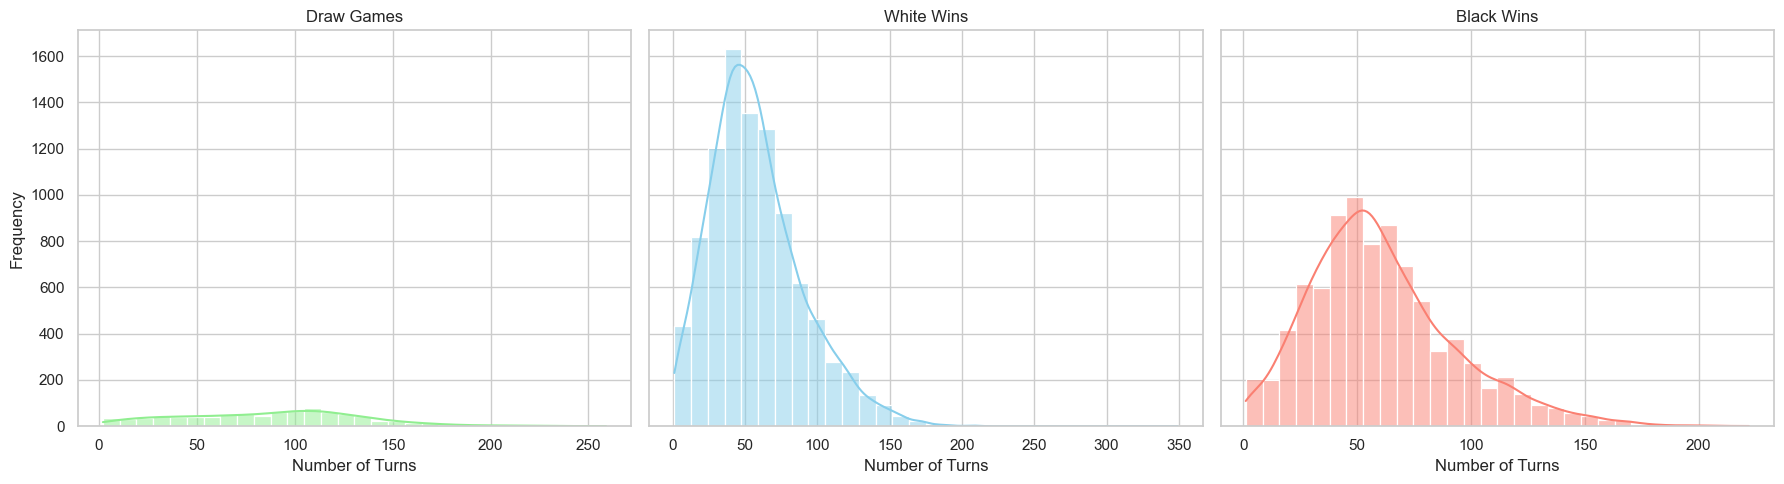

In [51]:
# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.histplot(df_draw['turns'], bins=30, kde=True, color='lightgreen', ax=axes[0])
axes[0].set_title('Draw Games')
axes[0].set_xlabel('Number of Turns')
axes[0].set_ylabel('Frequency')

sns.histplot(df_white_wins['turns'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('White Wins')
axes[1].set_xlabel('Number of Turns')

sns.histplot(df_black_wins['turns'], bins=30, kde=True, color='salmon', ax=axes[2])
axes[2].set_title('Black Wins')
axes[2].set_xlabel('Number of Turns')

plt.tight_layout()
plt.show()

In [52]:
# Perform T-test between Draws and White Wins
from scipy.stats import ttest_ind

t_stat_white, p_val_white = ttest_ind(df_draw['turns'], df_white_wins['turns'], equal_var=False)
print(f"T-test between Draws and White Wins: t-statistic = {t_stat_white:.2f}, p-value = {p_val_white:.4f}")

# Perform T-test between Draws and Black Wins
t_stat_black, p_val_black = ttest_ind(df_draw['turns'], df_black_wins['turns'], equal_var=False)
print(f"T-test between Draws and Black Wins: t-statistic = {t_stat_black:.2f}, p-value = {p_val_black:.4f}")

T-test between Draws and White Wins: t-statistic = 18.57, p-value = 0.0000
T-test between Draws and Black Wins: t-statistic = 16.62, p-value = 0.0000


## Question 2: Most Common Openings by Player Rating

Which openings are most commonly used, and how do they vary by player rating?

In [53]:
rating_bins = [0, 1100, 1600, 2000, 2300, 2600, np.inf]
rating_labels = ["Rookie", "Beginner", "Intermediate", "Advanced", "Expert", "GrandMaster"]

# Create categorical rating columns
clean_df['white_level'] = pd.cut(clean_df['white_rating'], bins=rating_bins, labels=rating_labels, right=False)
clean_df['black_level'] = pd.cut(clean_df['black_rating'], bins=rating_bins, labels=rating_labels, right=False)

# Verify the distribution
print(clean_df['white_level'].value_counts())
print(clean_df['black_level'].value_counts())

white_level
Beginner        9670
Intermediate    7078
Advanced        1512
Rookie           649
Expert           177
GrandMaster       27
Name: count, dtype: int64
black_level
Beginner        9755
Intermediate    6939
Advanced        1531
Rookie           712
Expert           160
GrandMaster       16
Name: count, dtype: int64


In [54]:
# Group data
openings_by_rating = clean_df.groupby(['opening_name', 'white_level']).size().reset_index(name='count')

# Calculate the total games per rating category
total_games_per_rating = clean_df.groupby('white_level').size().reset_index(name='total_games')

# Calculate percentages
openings_by_rating = openings_by_rating.merge(total_games_per_rating, on='white_level')
openings_by_rating['percentage'] = (openings_by_rating['count'] / openings_by_rating['total_games']) * 100

# Top 10
top_openings = openings_by_rating.sort_values(['white_level', 'count'], ascending=[True, False]).groupby('white_level').head(10)

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_6156/2974247331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  openings_by_rating = clean_df.groupby(['opening_name', 'white_level']).size().reset_index(name='count')
/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_6156/2974247331.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_games_per_rating = clean_df.groupby('white_level').size().reset_index(name='total_games')
/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_6156/2974247331.py:12: FutureWarning: The default of observed=False is deprecated and will be changed t

/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_6156/4291869514.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=top_openings.sort_values('percentage', ascending=False).groupby('white_level')['percentage'].transform(max).sort_values(ascending=False).index[:10]
/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykernel_6156/4291869514.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  order=top_openings.sort_values('percentage', ascending=False).groupby('white_level')['percentage'].transform(max).sort_values(ascending=False).index[:10]
/var/folders/b4/dqvjht991812wpssc6sdmlj00000gn/T/ipykerne

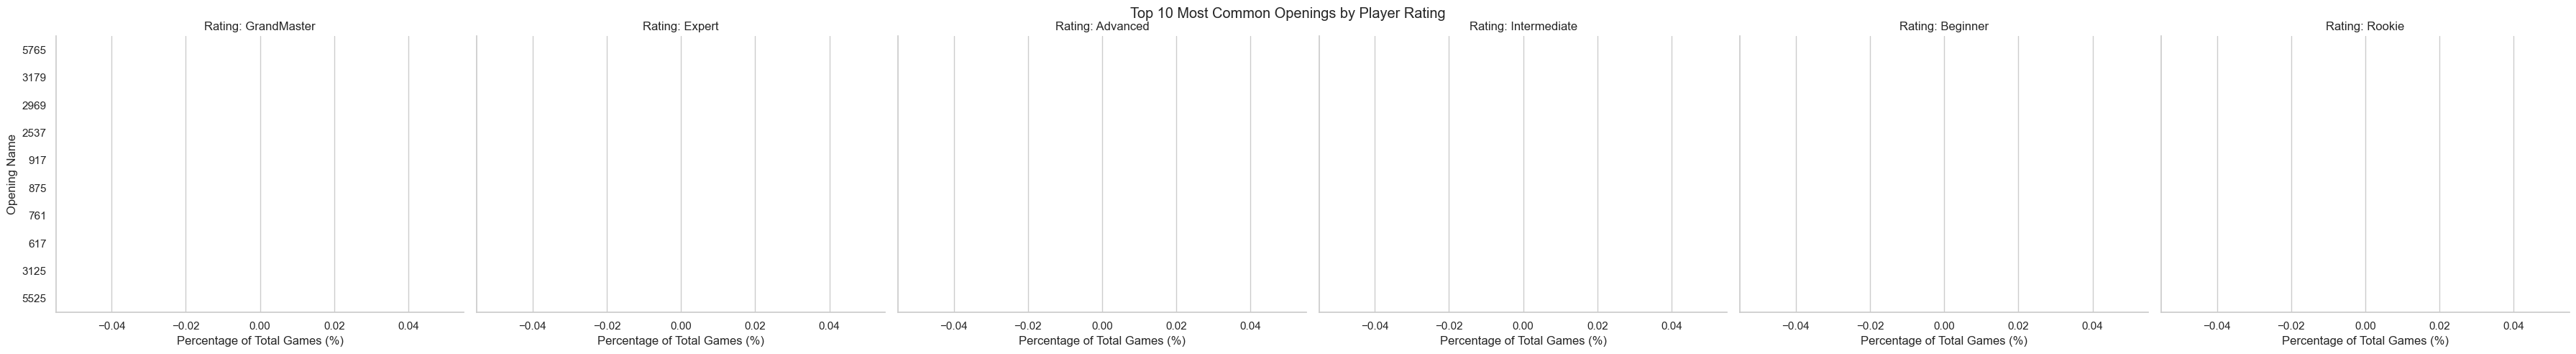

In [55]:
rating_order = ["GrandMaster", "Expert", "Advanced", "Intermediate", "Beginner", "Rookie"]
top_openings['white_level'] = pd.Categorical(top_openings['white_level'], categories=rating_order, ordered=True)

# Plot the top 10 openings
g = sns.catplot(
    data=top_openings,
    x='percentage',
    y='opening_name',
    col='white_level',
    kind='bar',
    height=5,
    aspect=1.2,
    palette='viridis',
    order=top_openings.sort_values('percentage', ascending=False).groupby('white_level')['percentage'].transform(max).sort_values(ascending=False).index[:10]
)

g.set_titles("Rating: {col_name}")
g.set_axis_labels("Percentage of Total Games (%)", "Opening Name")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 Most Common Openings by Player Rating")
plt.show()